In [1]:
# STEP 1: Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [2]:
# STEP 2: Load the UCI Airfoil dataset
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00291/airfoil_self_noise.dat"
columns = ['Frequency_Hz', 'Angle_of_Attack_deg', 'Chord_length_m',
           'Free_stream_velocity_m/s', 'Suction_side_displacement_thickness_m',
           'Sound_pressure_level_dB']

df = pd.read_csv(url, sep='\t', header=None, names=columns)


In [4]:
# STEP 3: Preview and inspect the data
print(df.head())
#shape
print("\nShape of dataset:", df.shape)
#missing values
print("\nMissing values in dataset:\n", df.isnull().sum())


   Frequency_Hz  Angle_of_Attack_deg  Chord_length_m  \
0           800                  0.0          0.3048   
1          1000                  0.0          0.3048   
2          1250                  0.0          0.3048   
3          1600                  0.0          0.3048   
4          2000                  0.0          0.3048   

   Free_stream_velocity_m/s  Suction_side_displacement_thickness_m  \
0                      71.3                               0.002663   
1                      71.3                               0.002663   
2                      71.3                               0.002663   
3                      71.3                               0.002663   
4                      71.3                               0.002663   

   Sound_pressure_level_dB  
0                  126.201  
1                  125.201  
2                  125.951  
3                  127.591  
4                  127.461  

Shape of dataset: (1503, 6)

Missing values in dataset:
 Frequency_

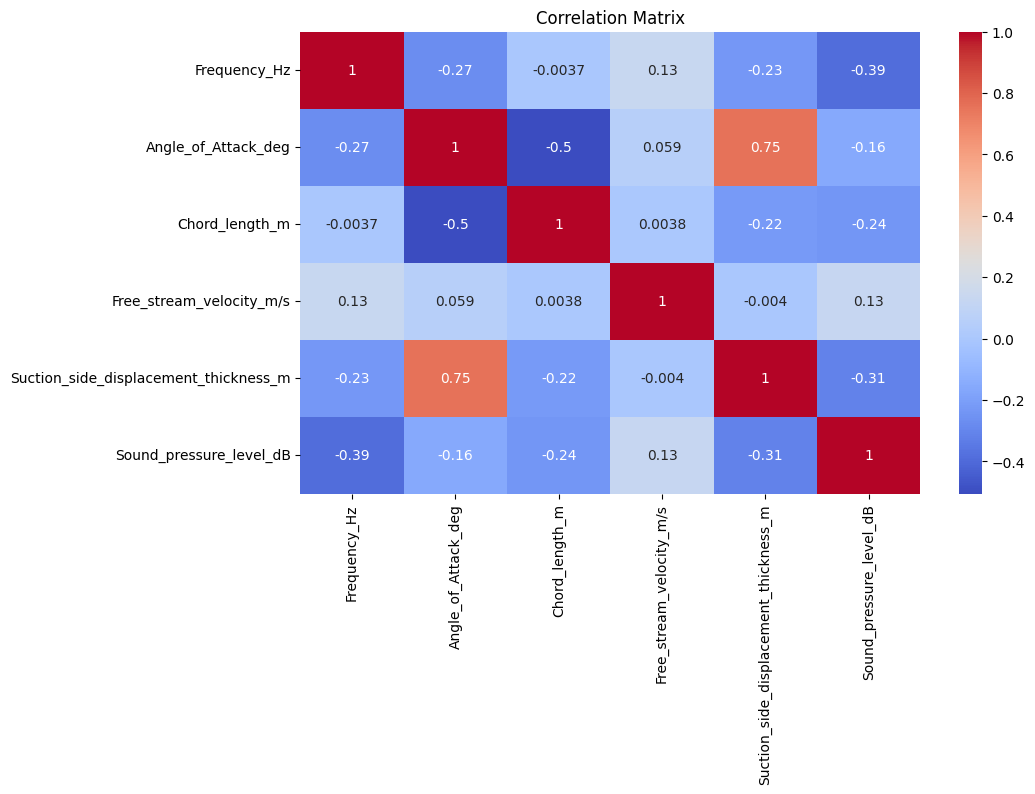

In [5]:
# STEP 4: Correlation of the features
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()


In [6]:
# STEP 5: Select features (X) and target (y)
X = df.drop('Sound_pressure_level_dB', axis=1)
y = df['Sound_pressure_level_dB']


In [7]:
# STEP 6: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=42)


In [8]:
# STEP 7a: Linear Regression Model
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)


In [9]:
# STEP 7b: Random Forest Model
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [11]:
# STEP 8a: Evaluation function
def evaluate_model(name, y_true, y_pred):
    print(f"\n📌 {name}")
    print("Mean Squared Error (MSE):", mean_squared_error(y_true, y_pred))
    print("R² Score:", r2_score(y_true, y_pred))


In [12]:
# STEP 8b: Compare model performance
evaluate_model("Linear Regression", y_test, y_pred_lr)
evaluate_model("Random Forest", y_test, y_pred_rf)



📌 Linear Regression
Mean Squared Error (MSE): 22.128643318247285
R² Score: 0.5582979754897284

📌 Random Forest
Mean Squared Error (MSE): 3.2787235884199353
R² Score: 0.9345545578196172


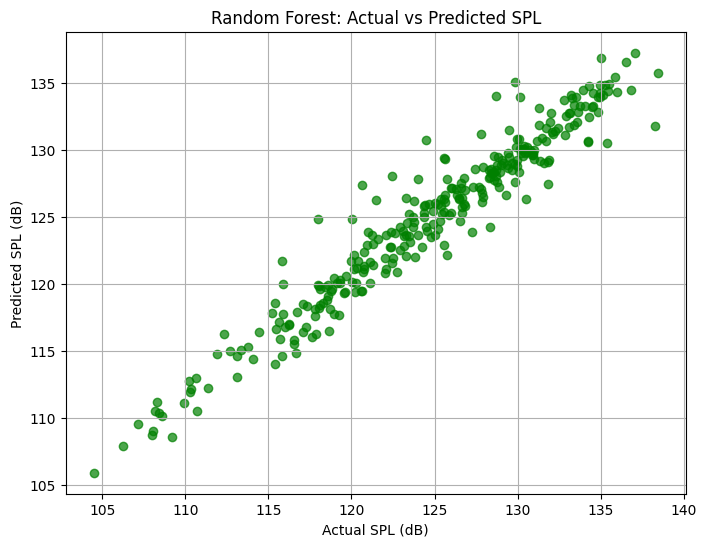

In [13]:
# STEP 9: Visualize actual vs predicted (Random Forest)
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf, alpha=0.7, color='green')
plt.xlabel("Actual SPL (dB)")
plt.ylabel("Predicted SPL (dB)")
plt.title("Random Forest: Actual vs Predicted SPL")
plt.grid(True)
plt.show()



📌 Tuned Random Forest
Mean Squared Error (MSE): 4.383889125672974
R² Score: 0.9124947393208881


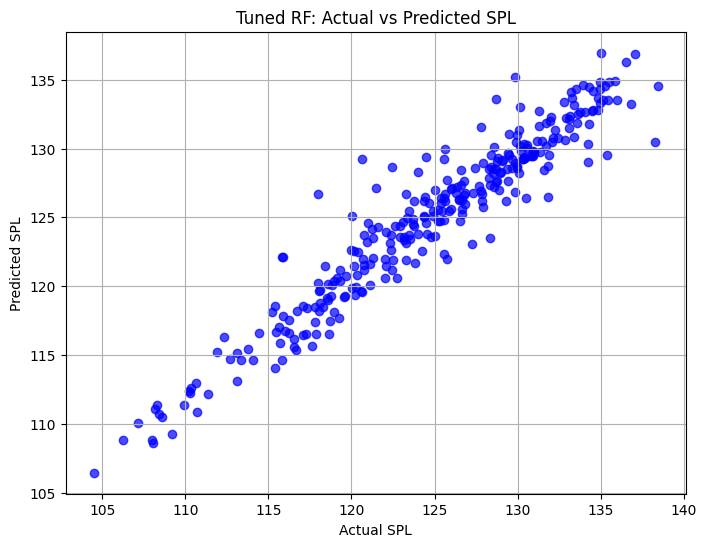

In [14]:
# STEP 1: Try different hyperparameters
rf_tuned = RandomForestRegressor(
    n_estimators=200,
    max_depth=12,
    min_samples_split=5,
    random_state=42
)
rf_tuned.fit(X_train, y_train)
y_pred_rf_tuned = rf_tuned.predict(X_test)

# STEP 2: Evaluate
evaluate_model("Tuned Random Forest", y_test, y_pred_rf_tuned)

# STEP 3: Plot predictions
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred_rf_tuned, alpha=0.7, color='blue')
plt.xlabel("Actual SPL")
plt.ylabel("Predicted SPL")
plt.title("Tuned RF: Actual vs Predicted SPL")
plt.grid(True)
plt.show()


In [15]:
# STEP: Create synthetic aerodynamic dataset
import random

def generate_airfoil_data(n_samples=500):
    data = []
    for _ in range(n_samples):
        camber = random.uniform(0, 0.09)           # Camber as a ratio (0–9%)
        thickness = random.uniform(0.06, 0.15)      # Thickness ratio (6%–15%)
        aoa = random.uniform(-5, 15)                # Angle of attack in degrees
        reynolds = random.uniform(1e5, 5e6)         # Reynolds number

        # Approximate Lift Coefficient using Thin Airfoil Theory:
        cl = 2 * np.pi * np.radians(aoa) * (1 + camber)

        # Noise to simulate real-world deviation
        cl += random.uniform(-0.1, 0.1)

        data.append([camber, thickness, aoa, reynolds, cl])

    return pd.DataFrame(data, columns=['Camber', 'Thickness', 'AoA', 'Reynolds', 'Cl'])

# Generate the dataset
cl_df = generate_airfoil_data()
cl_df.head()


,Camber,Thickness,AoA,Reynolds,Cl
0,0.012528,0.112878,13.406991,9.404382e+05,1.465575
1,0.077153,0.089786,6.555575,4.223995e+06,0.844264
2,0.056860,0.108268,-4.664208,2.105877e+06,-0.533595
3,0.086319,0.072900,12.467385,4.826419e+06,1.452166
4,0.060796,0.104384,11.948840,2.092333e+06,1.335484


/tmp/ipython-input-26-2979262083.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="crest")
/tmp/ipython-input-26-2979262083.py:22: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


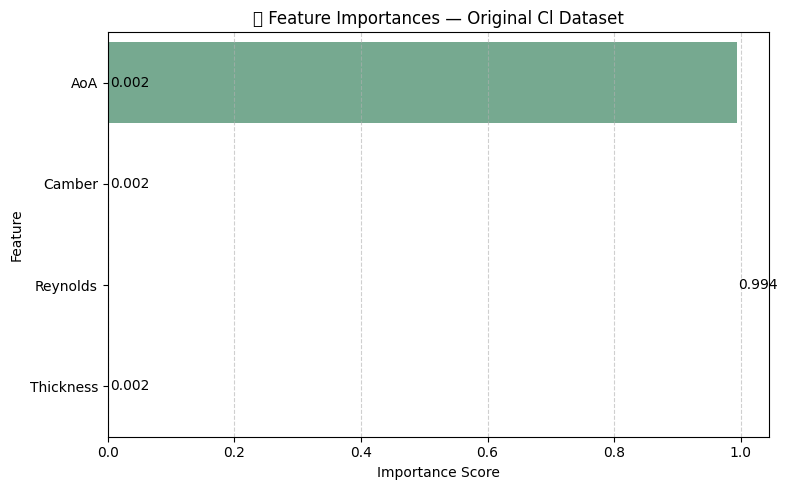

In [26]:
# feature importance
importance_df = pd.DataFrame({
    'Feature': X_cl.columns,
    'Importance': rf_cl.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot with all bars labeled
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="crest")

# Add text labels on bars
for index, row in importance_df.iterrows():
    plt.text(row['Importance'] + 0.002, index, f"{row['Importance']:.3f}", va='center')

plt.title("📊 Feature Importances — Original Cl Dataset")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.xlim(0, importance_df['Importance'].max() + 0.05)
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [16]:
# STEP 1: Prepare features and target from Cl dataset
X_cl = cl_df.drop("Cl", axis=1)
y_cl = cl_df["Cl"]

# STEP 2: Train-test split
X_train_cl, X_test_cl, y_train_cl, y_test_cl = train_test_split(
    X_cl, y_cl, test_size=0.2, random_state=42)



In [17]:
# STEP 3: Train Random Forest
from sklearn.ensemble import RandomForestRegressor

rf_cl = RandomForestRegressor(
    n_estimators=150,
    max_depth=10,
    random_state=42
)

rf_cl.fit(X_train_cl, y_train_cl)
y_pred_cl = rf_cl.predict(X_test_cl)


In [18]:
# STEP 4: Evaluate Cl model
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_test_cl, y_pred_cl)
r2 = r2_score(y_test_cl, y_pred_cl)

print("📈 Lift Coefficient Prediction Results")
print(f"🔹 Mean Squared Error: {mse:.4f}")
print(f"🔹 R² Score: {r2:.4f}")


📈 Lift Coefficient Prediction Results
🔹 Mean Squared Error: 0.0039
🔹 R² Score: 0.9924


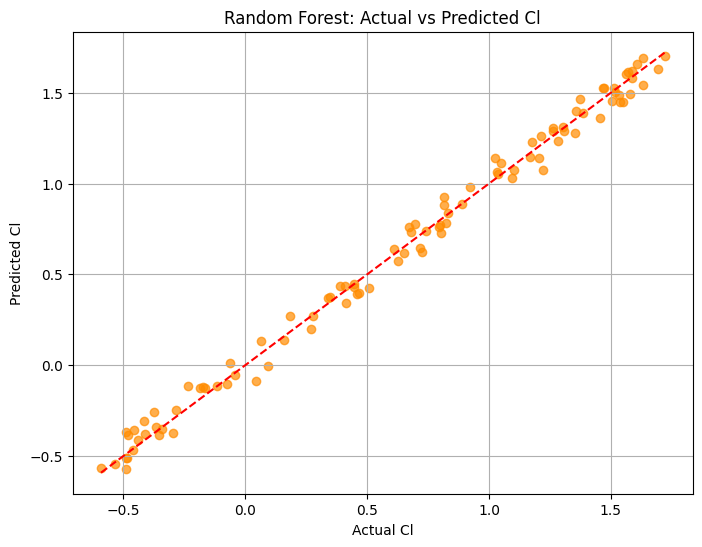

In [19]:
# STEP 5: Plot actual vs predicted Cl
plt.figure(figsize=(8,6))
plt.scatter(y_test_cl, y_pred_cl, alpha=0.7, color="darkorange")
plt.plot([min(y_test_cl), max(y_test_cl)], [min(y_test_cl), max(y_test_cl)], 'r--')
plt.xlabel("Actual Cl")
plt.ylabel("Predicted Cl")
plt.title("Random Forest: Actual vs Predicted Cl")
plt.grid(True)
plt.show()


/tmp/ipython-input-24-3440791537.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=importance_df, x="Importance", y="Feature", palette="crest")
/tmp/ipython-input-24-3440791537.py:20: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


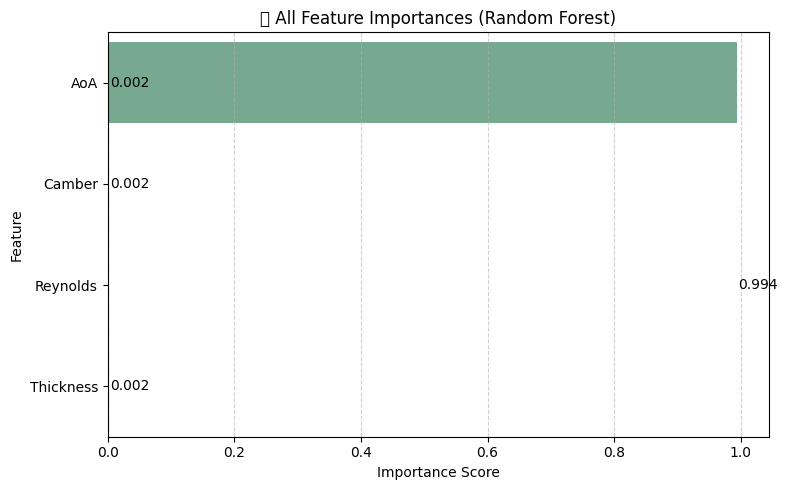

In [24]:
# Create importance DataFrame
importance_df = pd.DataFrame({
    'Feature': X_cl.columns,
    'Importance': rf_cl.feature_importances_
}).sort_values(by='Importance', ascending=False)

# Plot all, even small contributions
plt.figure(figsize=(8, 5))
sns.barplot(data=importance_df, x="Importance", y="Feature", palette="crest")

# Add value labels on bars
for index, row in importance_df.iterrows():
    plt.text(row['Importance'] + 0.002, index, f"{row['Importance']:.3f}", va='center')

plt.title("📊 All Feature Importances (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Feature")
plt.xlim(0, importance_df['Importance'].max() + 0.05)  # extra space for labels
plt.grid(True, axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [21]:
# Try different combinations of RF parameters
depths = [5, 10, 15]
trees = [50, 100, 200]

print("🧪 Tuning Random Forest:")
for d in depths:
    for n in trees:
        model = RandomForestRegressor(n_estimators=n, max_depth=d, random_state=42)
        model.fit(X_train_cl, y_train_cl)
        preds = model.predict(X_test_cl)
        r2 = r2_score(y_test_cl, preds)
        print(f"Max Depth: {d}, Trees: {n} → R² Score: {r2:.4f}")


🧪 Tuning Random Forest:
Max Depth: 5, Trees: 50 → R² Score: 0.9919
Max Depth: 5, Trees: 100 → R² Score: 0.9920
Max Depth: 5, Trees: 200 → R² Score: 0.9921
Max Depth: 10, Trees: 50 → R² Score: 0.9921
Max Depth: 10, Trees: 100 → R² Score: 0.9924
Max Depth: 10, Trees: 200 → R² Score: 0.9924
Max Depth: 15, Trees: 50 → R² Score: 0.9920
Max Depth: 15, Trees: 100 → R² Score: 0.9923
Max Depth: 15, Trees: 200 → R² Score: 0.9924


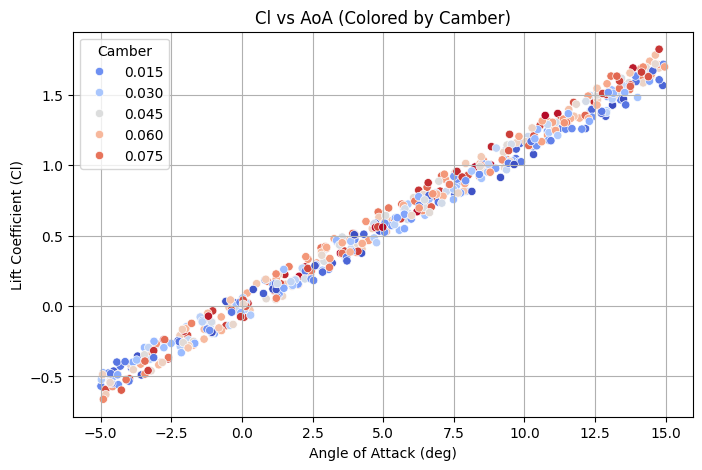

In [22]:
# Visualize how Cl changes with AoA
plt.figure(figsize=(8, 5))
sns.scatterplot(data=cl_df, x="AoA", y="Cl", hue="Camber", palette="coolwarm")
plt.title("Cl vs AoA (Colored by Camber)")
plt.xlabel("Angle of Attack (deg)")
plt.ylabel("Lift Coefficient (Cl)")
plt.grid(True)
plt.show()


In [27]:
#comparison of gradient boosting and random forest
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# Train Gradient Boosting Regressor
gbr = GradientBoostingRegressor(n_estimators=150, max_depth=5, learning_rate=0.1, random_state=42)
gbr.fit(X_train_cl, y_train_cl)
y_pred_gbr = gbr.predict(X_test_cl)

# Re-evaluate Random Forest (for side-by-side comparison)
y_pred_rf = rf_cl.predict(X_test_cl)

# Compare Results
print("📊 Model Comparison on Cl Prediction:")
print("➡️ Random Forest:")
print(f"   MSE: {mean_squared_error(y_test_cl, y_pred_rf):.4f}")
print(f"   R²:  {r2_score(y_test_cl, y_pred_rf):.4f}\n")

print("➡️ Gradient Boosting:")
print(f"   MSE: {mean_squared_error(y_test_cl, y_pred_gbr):.4f}")
print(f"   R²:  {r2_score(y_test_cl, y_pred_gbr):.4f}")


📊 Model Comparison on Cl Prediction:
➡️ Random Forest:
   MSE: 0.0039
   R²:  0.9924

➡️ Gradient Boosting:
   MSE: 0.0043
   R²:  0.9916


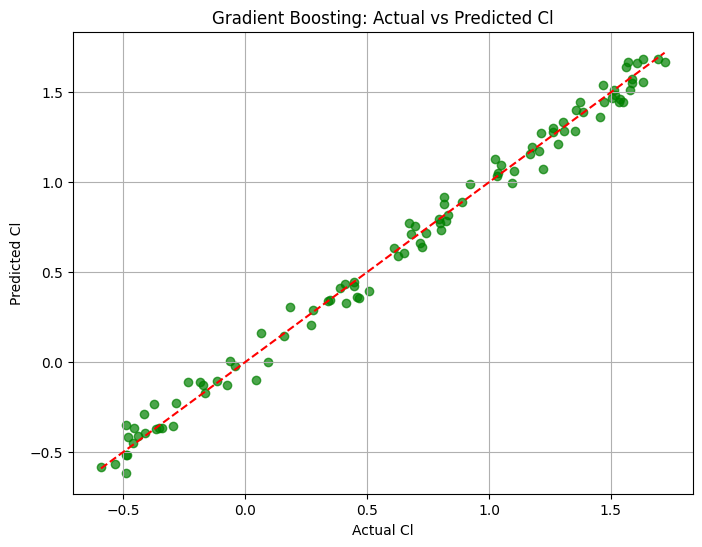

In [28]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test_cl, y_pred_gbr, alpha=0.7, color='green')
plt.plot([min(y_test_cl), max(y_test_cl)], [min(y_test_cl), max(y_test_cl)], 'r--')
plt.xlabel("Actual Cl")
plt.ylabel("Predicted Cl")
plt.title("Gradient Boosting: Actual vs Predicted Cl")
plt.grid(True)
plt.show()


/tmp/ipython-input-30-3428192456.py:14: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


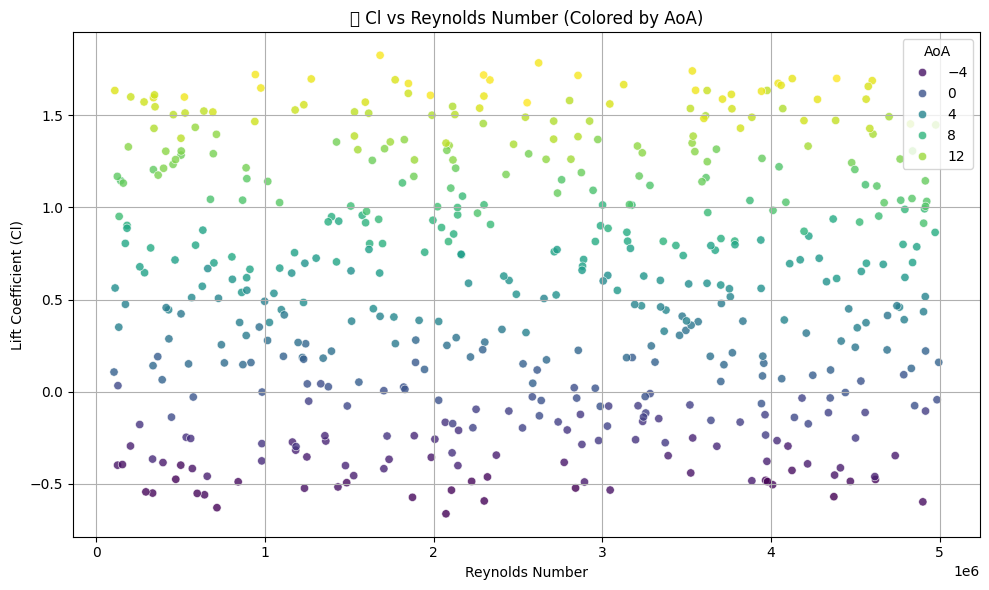

In [30]:
plt.figure(figsize=(10, 6))
sns.scatterplot(
    data=cl_df,
    x="Reynolds",
    y="Cl",
    hue="AoA",
    palette="viridis",
    alpha=0.8
)
plt.title("📈 Cl vs Reynolds Number (Colored by AoA)")
plt.xlabel("Reynolds Number")
plt.ylabel("Lift Coefficient (Cl)")
plt.grid(True)
plt.tight_layout()
plt.show()


In [35]:
import joblib

# Save Random Forest
joblib.dump(rf_cl, "rf_model.pkl")




['rf_model.pkl']

In [36]:
# Save Gradient Boosting
joblib.dump(gbr, "gbr_model.pkl")

['gbr_model.pkl']